In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from pandas.plotting import scatter_matrix
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("adult.csv")
df.head()

Saving adult.csv to adult (1).csv


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.replace('?', np.NaN, inplace= True)
df = df.dropna().reset_index(drop = True)           #2000 rows deleted 

<Axes: >

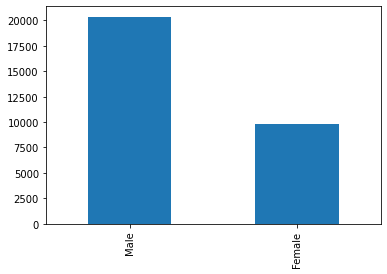

In [ ]:
df['sex'].value_counts().plot(kind='bar').  #plotting for sex count 

In [ ]:
df_workclass= df["workclass"].value_counts()        #plotting for workclass count 
df_workclass

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [ ]:
df['education'].unique() # finding unique for education column

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [ ]:
df['workclass'].unique() # finding unique for workclass column

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

In [ ]:
df2= df['workclass'].groupby(df['education']).value_counts()
df2.sort_values(ascending= False).head(10)

education     workclass       
HS-grad       Private             7678
Some-college  Private             5016
Bachelors     Private             3455
Assoc-voc     Private              993
11th          Private              917
Masters       Private              863
HS-grad       Self-emp-not-inc     857
Assoc-acdm    Private              720
10th          Private              686
HS-grad       Local-gov            498
Name: workclass, dtype: int64

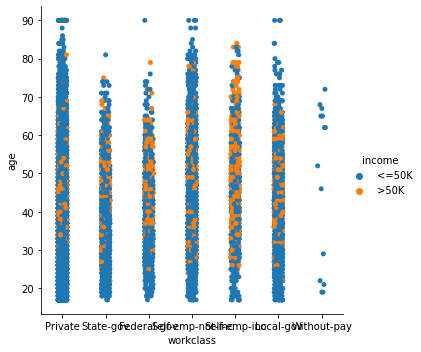

In [ ]:
sns.catplot(data=df, x="workclass", y="age", hue='income')

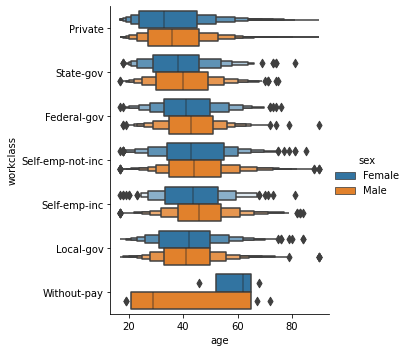

In [ ]:
sns.catplot(data=df, x="age", y="workclass",hue='sex', kind="boxen")      #can change the kind to box

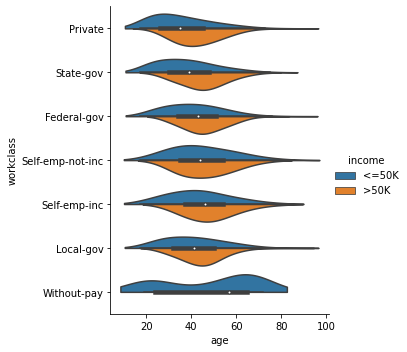

In [ ]:
sns.catplot(
    data=df, x="age", y="workclass", hue="income",
    kind="violin", bw=.5, cut=1, split=True,
)

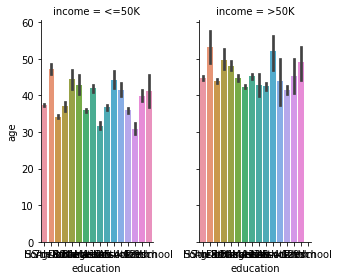

In [ ]:
sns.catplot(
    data=df, x="education", y="age", col="income",
    kind="bar", height=4, aspect=.6,
)

In [ ]:
g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

Mean: 38.437901995888865
Standard deviation: 13.134447039742293
Minimum: 17
Maximum: 90
Median: 37.0


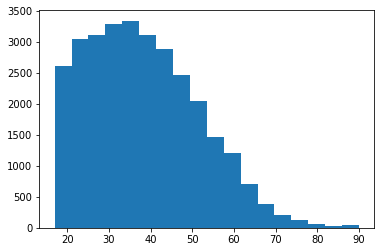

In [ ]:
def get_statistics(data, bins=18):   #creating function to find mean, standard deviation, maximum, minimum, median and plotting it 
    total = data.values
    print('Mean:', np.mean(total))
    print('Standard deviation:', np.std(total))
    print('Minimum:', np.min(total))
    print('Maximum:', np.max(total))
    print('Median:', np.median(total))
    plt.hist(data, bins=bins);

get_statistics(df.age)

In [ ]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30159,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.rename(columns={"native.country": "nativecountry", "marital.status": "maritalstat"}, inplace=True).  #renaming the 3 columns 

In [ ]:
#replacing the Country names to numerical
df.nativecountry.replace(('United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands'),(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace=True)
df.maritalstat.replace(('Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'),(1,2,3,4,5,6,7), inplace=True)

In [ ]:
# Describes the statistical data like count, mean, standard deviation etc.
print("Statistical Description of the Dataset: ", df.describe()) 

Statistical Description of the Dataset:                  age        fnlwgt  education.num   maritalstat  capital.gain  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312      2.053213   1092.007858   
std       13.134665  1.056530e+05       2.549995      1.170881   7406.346497   
min       17.000000  1.376900e+04       1.000000      1.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      1.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      2.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      3.000000      0.000000   
max       90.000000  1.484705e+06      16.000000      7.000000  99999.000000   

       capital.loss  hours.per.week  nativecountry  
count  30162.000000    30162.000000   30162.000000  
mean      88.372489       40.931238       2.515583  
std      404.298370       11.979984       5.641075  
min        0.000000       

In [ ]:
df_adult = df.corr() # Dercribes the correlation of the Adult Incomes using Pearson Correlation method
df_adult

,age,fnlwgt,education.num,maritalstat,capital.gain,capital.loss,hours.per.week,nativecountry
age,1.000000,-0.076511,0.043526,-0.229179,0.080154,0.060165,0.101599,-0.035854
fnlwgt,-0.076511,1.000000,-0.044992,0.028843,0.000422,-0.009750,-0.022886,0.101715
education.num,0.043526,-0.044992,1.000000,-0.103014,0.124416,0.079646,0.152522,-0.164779
maritalstat,-0.229179,0.028843,-0.103014,1.000000,-0.073526,-0.069384,-0.226755,0.052469
capital.gain,0.080154,0.000422,0.124416,-0.073526,1.000000,-0.032229,0.080432,-0.017108
capital.loss,0.060165,-0.009750,0.079646,-0.069384,-0.032229,1.000000,0.052417,-0.020918
hours.per.week,0.101599,-0.022886,0.152522,-0.226755,0.080432,0.052417,1.000000,-0.018839
nativecountry,-0.035854,0.101715,-0.164779,0.052469,-0.017108,-0.020918,-0.018839,1.000000


Principal Component Analysis on Standardize Data

---



In [ ]:
# Standardize the data
mean = np.mean(df, axis = 0)
std = np.std(df, axis = 0)
df_std = (df - mean)/std

In [ ]:
# Calculate the covariance matrix
covariance_matrix = np.cov(df_std.T)
covariance_matrix

# Calculate the eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Sort eigen values and eigen vectors
idx = eigen_values.argsort()[::-1]   
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

# Calculate the first two principal component scores on standardize data
PC1 = eigen_vectors[:,0]
PC2 = eigen_vectors[:,1]
pc_scores = np.dot(df_std, np.column_stack((PC1,PC2)))
print(pc_scores[:5])

AttributeError: ignored

Performace Evaluation

---



In [ ]:
#Categorical Data Frame
#X axis = We concatenate the Relationship, Education,Race,Occupation columns concate using np.c_ provided by the numpy library
df_x_cat = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['sex'],df['maritalstat'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])
# df_x = df.iloc[:,:13]
#Y axis = Our dependent variable or the income of adult i.e Income
df_y = pd.DataFrame(df.income)

In [ ]:
# Numerical Variables dataframe
df_x_num = pd.DataFrame(np.c_[df['age'],df['maritalstat'],df['capital.gain'],df['capital.loss'],df['hours.per.week']], columns = ['age','maritalstat','capital.gain','capital.loss','hours.per.week'])
df_x_num

,age,maritalstat,capital.gain,capital.loss,hours.per.week
0,82,5,0,4356,18
1,54,2,0,3900,40
2,41,4,0,3900,40
3,34,2,0,3770,45
4,38,4,0,3770,40
...,...,...,...,...,...
30157,22,3,0,0,40
30158,27,1,0,0,38
30159,40,1,0,0,40
30160,58,5,0,0,40


In [ ]:
# Standardize the data
mean = np.mean(df_x_num, axis = 0)
std = np.std(df_x_num, axis = 0)
df_xstd = (df_x_num - mean)/std
df_xstd

,age,maritalstat,capital.gain,capital.loss,hours.per.week
0,3.316630,2.516768,-0.147445,10.555814,-1.914161
1,1.184831,-0.045447,-0.147445,9.427915,-0.077734
2,0.195067,1.662696,-0.147445,9.427915,-0.077734
3,-0.337883,-0.045447,-0.147445,9.106365,0.339636
4,-0.033340,1.662696,-0.147445,9.106365,-0.077734
...,...,...,...,...,...
30157,-1.251511,0.808624,-0.147445,-0.218586,-0.077734
30158,-0.870832,-0.899519,-0.147445,-0.218586,-0.244682
30159,0.118931,-0.899519,-0.147445,-0.218586,-0.077734
30160,1.489374,2.516768,-0.147445,-0.218586,-0.077734


In [ ]:
df_xdummies = pd.get_dummies(df_x_cat, sparse=True) #one-hot encoding
df_xdummies

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,education_10th,education_11th,education_12th,education_1st-4th,...,marital_5,marital_6,marital_7,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30158,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30159,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30160,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
# merging/ joining two df that was found above  
df_xconcat = pd.concat([df_xstd,df_xdummies], axis = 1)
df_xconcat

,age,maritalstat,capital.gain,capital.loss,hours.per.week,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,...,marital_5,marital_6,marital_7,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,3.316630,2.516768,-0.147445,10.555814,-1.914161,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1.184831,-0.045447,-0.147445,9.427915,-0.077734,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.195067,1.662696,-0.147445,9.427915,-0.077734,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,-0.337883,-0.045447,-0.147445,9.106365,0.339636,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,-0.033340,1.662696,-0.147445,9.106365,-0.077734,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,-1.251511,0.808624,-0.147445,-0.218586,-0.077734,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30158,-0.870832,-0.899519,-0.147445,-0.218586,-0.244682,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30159,0.118931,-0.899519,-0.147445,-0.218586,-0.077734,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
30160,1.489374,2.516768,-0.147445,-0.218586,-0.077734,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


Train-Test Data and Applying SVM
---



In [ ]:
#importing libraries 
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# For SVM we have to replace 0 with -1 
df_ynew = df_y.replace(to_replace='<=50K',value=-1)
df_ynew2 = df_ynew.replace(to_replace = '>50K', value = 1)

In [ ]:
df_ynew2.head(10)

,income
0,-1
1,-1
2,-1
3,-1
4,-1
5,1
6,-1
7,1
8,1
9,1


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_xconcat, df_ynew2, test_size=0.3)

In [ ]:
#Create a svm Classifier
svc = LinearSVC(max_iter = 5000, dual = False)

#Train the model using the training sets
svc.fit(x_train1, y_train1)

LinearSVC(dual=False, max_iter=5000)

In [ ]:
# parameters = {'kernel':list(['linear']), 'C':[1, 5]}
svm = svm.SVC(kernel='poly',probability=True)
svm.fit(x_train1, y_train1)
svm

SVC(kernel='poly', probability=True)

In [ ]:
# Make the predictions
y_predict1 = svm.predict(x_test1)
 
# Measure the performance 
print("Accuracy score %.3f" %metrics.accuracy_score(y_test1, y_predict1))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test1, y_predict1))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test1, y_predict1))

Accuracy score 0.850
Precision: 0.7606885063853415
Recall: 0.5964301262516326


In [ ]:
# from sklearn.metrics import roc_curve, auc
# train_fpr, train_tpr, tr_thresholds = roc_curve(y_train1, y_predict1)
# test_fpr, test_tpr, te_thresholds = roc_curve(y_test1, y_predict1)

# plt.grid()

# plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
# plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
# plt.plot([0,1],[0,1],'g--')
# plt.legend()
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("AUC(ROC curve)")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
# plt.show()

ValueError: ignored

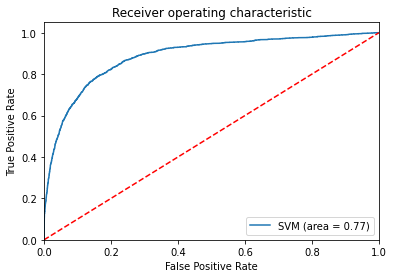

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_test1, y_predict1)
fpr, tpr, thresholds = roc_curve(y_test1, svm.predict_proba(x_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [ ]:
#importing confusion matrix libraries and finding confusion matrix
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test1, y_predict1)
print('Confusion matrix\n\n', cm1)
print('\nTrue Positives(TP) = ', cm1[0,0])
print('\nTrue Negatives(TN) = ', cm1[1,1])
print('\nFalse Positives(FP) = ', cm1[0,1])
print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[6321  431]
 [ 927 1370]]

True Positives(TP) =  6321

True Negatives(TN) =  1370

False Positives(FP) =  431

False Negatives(FN) =  927


<Axes: >

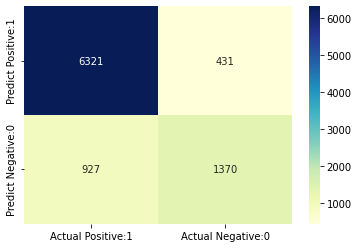

In [ ]:
#plotting confusion matrix 
cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# finding classification matrix 
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

          -1       0.87      0.94      0.90      6752
           1       0.76      0.60      0.67      2297

    accuracy                           0.85      9049
   macro avg       0.82      0.77      0.79      9049
weighted avg       0.84      0.85      0.84      9049



## KNN

---



In [ ]:
# For KNN we have to replace 0 with 1 
df_yknn = df.income.replace(('<=50K', '>50K'),(0,1))

In [ ]:
df_yknn.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    1
8    1
9    1
Name: income, dtype: int64

In [ ]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(df_xconcat, df_yknn, test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
y_pred = knn.predict(x_test)

In [ ]:
#check accuracy of our model on the test data
knn.score(x_test, y_test)

0.830146977566582

In [ ]:
# Measure the performance 
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy score 0.830
Precision: 0.6763565891472868
Recall: 0.6163355408388521


In [ ]:
print("Mean Absolute Error is: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error is: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error is: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error is:  0.16985302243341804
Mean Squared Error is:  0.16985302243341804
Root Mean Squared Error is:  0.4121322875405639


In [ ]:
from sklearn.metrics import f1_score
#calculate F1 score
f1_score(y_test, y_pred)

0.6449526449526449

# Logistic regression

In [ ]:
#importing logistic regression libraries  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#renaming income column variable as 0 and 1
df_y= df['income'].replace({'<=50K': 0,'>50K': 1 })
df_y.unique()

array([0, 1])

In [ ]:
#splitting data in train and test for logistic regression 
X_train, X_test, y_train, y_test = train_test_split(df_xconcat, df_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predicting the test dataset
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [ ]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6308  453]
 [ 930 1358]]


In [ ]:
#finding classification matrix  
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6761
           1       0.75      0.59      0.66      2288

    accuracy                           0.85      9049
   macro avg       0.81      0.76      0.78      9049
weighted avg       0.84      0.85      0.84      9049



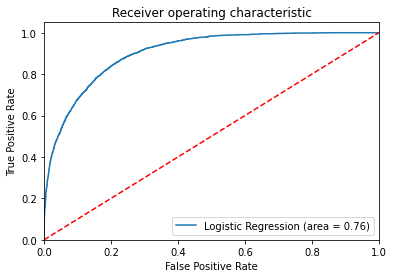

In [ ]:
#making roc curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Naives Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(df_xconcat, df_y, test_size=0.3, random_state=0)

# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#predicting the test dataset
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
#printing the accuracy score  
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6526


In [ ]:
#predicting train dataset of independent variables
y_pred_train = gnb.predict(X_train)
y_pred_train

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
#displaying accuracy score
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6485


In [ ]:
#finding score of train and test dataset
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.6485
Test set score: 0.6526


In [ ]:
y_test.value_counts()

0    6761
1    2288
Name: income, dtype: int64

In [ ]:
null_accuracy = (7407/(7407+2362))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [ ]:
#we can conclude that our Gaussian Naive Bayes Classification model is not doing a good job in predicting the class labels.

In [ ]:
#finding confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3794 2967]
 [ 177 2111]]

True Positives(TP) =  3794

True Negatives(TN) =  2111

False Positives(FP) =  2967

False Negatives(FN) =  177


<Axes: >

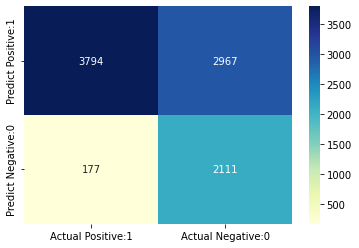

In [ ]:
#plotting confusion matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#making classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.56      0.71      6761
           1       0.42      0.92      0.57      2288

    accuracy                           0.65      9049
   macro avg       0.69      0.74      0.64      9049
weighted avg       0.82      0.65      0.67      9049



In [ ]:
#finding classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.6526


In [ ]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3474


Text(0, 0.5, 'Frequency')

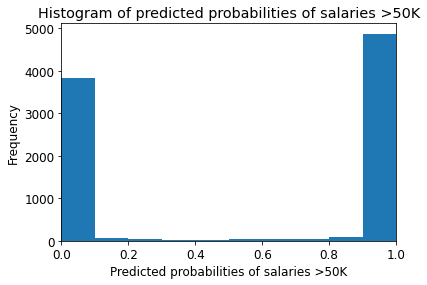

In [ ]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

In [ ]:
# We can see that the above histogram is highly positive skewed.
# The first column tell us that there are approximately 4900 observations with probability between 0.9 and 1.0 whose salary is >50K.
# There are relatively small number of observations with probability < 0.5.
# So, these small number of observations predict that the salaries will be <=50K.


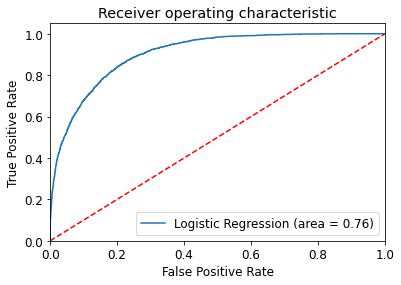

In [ ]:
#plotting ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()